import required packages

In [2]:
# Third party packages.
import pandas as pd             # Data handling
import numpy as np              # Numeric calculations
import pickle                   # Save and load data
import altair as alt            # Visualize data
# import seaborn as sns           # Visualize data
import matplotlib.pyplot as plt # Visualize data
import json
from scipy.stats import pearsonr # Correlation

load csv file

In [3]:
# Load API Key and download directory from config file
CONFIG_FILE = "../config/api-call.json"

def load_config(config_path):
    """Load configuration from a JSON file."""
    with open(config_path, "r") as file:
        return json.load(file)

# Load config values
config = load_config(CONFIG_FILE)

# print(config)
DOWNLOAD_DIR = config["ned"]["ned_download_dir"]
print("DOWNLOAD_DIR :", DOWNLOAD_DIR)
csv_file_path = f'{DOWNLOAD_DIR}/power-gen-consolidated-data-2022-2024.csv'

# with open('../data/dc-ned-json-data-1.pkl', 'rb') as pickle_file:
with open(csv_file_path, 'rb') as csv_file:
    dc_ned_json_data_1 = pd.read_csv(csv_file)
# df_ned_json_data = dc_ned_json_data_1['df_orig']
df_ned_json_data = pd.DataFrame(dc_ned_json_data_1)  # Convert dictionary to DataFrame

DOWNLOAD_DIR : ../data/powergen/


set pandas dataframe settings

In [4]:
# Setting Pandas options.
pd.set_option("display.max_rows", 50) # How to display all rows from data frame using pandas. Setting value to None to show all rows.
pd.set_option("display.max_columns", None)
pd.set_option("display.max_info_columns", 100)
pd.set_option("display.max_info_rows", 1000000)
pd.set_option("display.precision", 2)
#pd.set_option("styler.format.precision", 2)

Descriptive analytics

In [5]:
# Show a sample of first 3 rows.
df_ned_json_data.head(3)

,validto,capacity_0,volume_0,capacity_1,production_wind,capacity_2,production_solar,capacity_4,production_heatpump,capacity_8,production_cofiring,capacity_9,production_geothermal,capacity_10,production_other,capacity_11,production_waste,capacity_12,production_biooil,capacity_13,production_biomass,capacity_14,production_wood,capacity_17,production_windoffshore,capacity_18,production_fossilgaspower,capacity_19,production_fossilhardcoal,capacity_20,production_nuclear,capacity_21,production_wastepower,capacity_22,production_windoffshoreB,capacity_25,production_biomasspower,capacity_26,production_otherpower,capacity_27,production_electricitymix,capacity_28,volume_28,capacity_35,production_CHP_total,capacity_50,production_solarthermal,capacity_51,production_allconsuminggas
0,2022-01-01 00:00:00+00:00,8098513,8098513,2031015,2031015,0,0,161795,161795,699000,699000,136032,136032,55998,55998,458627,458627,913004,913004,872107,872107,336949,336949,1364456,1364456,1714000,1714000,1926636,1926636,485000,485000,408500,408500,1865500,1865500,447364,447364,241000,241000,10246506,10246506,NaN,NaN,1127491,1127491,482,482,1865500,1865500
1,2022-01-01 01:00:00+00:00,7914843,7914843,1864849,1864849,0,0,198870,198870,699000,699000,135768,135768,55998,55998,458131,458131,913011,913011,871174,871174,310137,310137,1290465,1290465,1823000,1823000,1592074,1592074,485000,485000,407250,407250,1839500,1839500,646176,646176,241000,241000,10083044,10083044,NaN,NaN,1184195,1184195,391,391,1839500,1839500
2,2022-01-01 02:00:00+00:00,7442013,7442013,1784513,1784513,0,0,222172,222172,698995,698995,135582,135582,55996,55996,457782,457782,913018,913018,870521,870521,305717,305717,1345134,1345134,1956250,1956250,1500851,1500851,485000,485000,407750,407750,1429250,1429250,609149,609149,241000,241000,9595627,9595627,NaN,NaN,1181864,1181864,444,444,1429250,1429250


Data Understanding

a. Which variables are numerical and which can categorical? How many variables are of both types?

In [6]:
print(
    f"Number of columns in the original data: "
    f"{df_ned_json_data.shape[1]}"
    "\n"
)

df_orig_num    = df_ned_json_data.select_dtypes(include='number')
l_df_num_names = df_orig_num.columns.tolist()

print(f"\nNumber of numerical variables: {len(l_df_num_names)}")
print(l_df_num_names)


df_orig_cat    = df_ned_json_data.select_dtypes(include='object')
l_df_cat_names = list(df_orig_cat.columns)

print(f"\nNumber of categorical variables: {len(l_df_cat_names)}")
print(l_df_cat_names)


Number of columns in the original data: 49


Number of numerical variables: 48
['capacity_0', 'volume_0', 'capacity_1', 'production_wind', 'capacity_2', 'production_solar', 'capacity_4', 'production_heatpump', 'capacity_8', 'production_cofiring', 'capacity_9', 'production_geothermal', 'capacity_10', 'production_other', 'capacity_11', 'production_waste', 'capacity_12', 'production_biooil', 'capacity_13', 'production_biomass', 'capacity_14', 'production_wood', 'capacity_17', 'production_windoffshore', 'capacity_18', 'production_fossilgaspower', 'capacity_19', 'production_fossilhardcoal', 'capacity_20', 'production_nuclear', 'capacity_21', 'production_wastepower', 'capacity_22', 'production_windoffshoreB', 'capacity_25', 'production_biomasspower', 'capacity_26', 'production_otherpower', 'capacity_27', 'production_electricitymix', 'capacity_28', 'volume_28', 'capacity_35', 'production_CHP_total', 'capacity_50', 'production_solarthermal', 'capacity_51', 'production_allconsuminggas']

Number

Next to check for missing values, variable completeness

df_orig_num.info()

Create a frequency table counting number of missing values per variable

In [7]:
# Pandas Series with type of each variable (variable, column) in df_orig.
ps_missing_type    = df_ned_json_data.dtypes

# Number of missing data per variable.
ps_missing_total   = df_ned_json_data.isnull().sum()

# Percentage of missing per variable.
ps_missing_percent = round(100 * ps_missing_total / df_ned_json_data.shape[0], 1)

In [8]:
# Create table (Pandas DataFrame).
df_missing_data = pd.DataFrame({

    'data_type':   ps_missing_type,
    'empty_total': ps_missing_total,
    'empty_perc':  ps_missing_percent
})

# Sort table by number of missing data in descending order.
df_missing_data.sort_values(
    by        = 'empty_total',
    ascending = False,
    inplace   = True
)

# Remove variables that have no missing values.
df_missing_data = df_missing_data.query("empty_total > 0")

# Show table.
print(
    f"Number of variables having missing data: "
    f"{df_missing_data.shape[0]} (out of {df_ned_json_data.shape[1]})"
)

df_missing_data

Number of variables having missing data: 2 (out of 49)


,data_type,empty_total,empty_perc
volume_28,float64,19927,75.8
capacity_28,float64,19927,75.8


Conduct descriptive / summary statistics

In [12]:
df_orig_num.describe()
df_orig_cat.describe()

,validto
count,26304
unique,26304
top,2022-01-01 00:00:00+00:00
freq,1


data preparation phase

In [13]:
df_orig_num.median()

capacity_0                    9.34e+06
volume_0                      9.34e+06
capacity_1                    1.31e+06
production_wind               1.31e+06
capacity_2                    8.14e+04
production_solar              8.14e+04
capacity_4                    5.70e+05
production_heatpump           5.70e+05
capacity_8                    6.93e+05
production_cofiring           6.93e+05
capacity_9                    1.55e+05
production_geothermal         1.55e+05
capacity_10                   2.15e+04
production_other              2.15e+04
capacity_11                   4.74e+05
production_waste              4.74e+05
capacity_12                   8.60e+05
production_biooil             8.60e+05
capacity_13                   5.93e+05
production_biomass            5.93e+05
capacity_14                   3.29e+05
production_wood               3.29e+05
capacity_17                   1.26e+06
production_windoffshore       1.26e+06
capacity_18                   2.97e+06
production_fossilgaspower

Impute missing values

In [20]:
df_imputed_num = df_orig_num.replace(np.nan, df_orig_num.median())

print("Median values in original numerical data (first five variables):")
print(df_orig_num.median().head(5))

print("\nMedian values in imputed numerical data (first five variables):")
print(df_imputed_num.median().head(5))


print(
    f"\nNumber of missing data in imputed data: "
    f"{df_imputed_num.isna().sum().sum()}"
)

Median values in original numerical data (first five variables):
capacity_0         9.34e+06
volume_0           9.34e+06
capacity_1         1.31e+06
production_wind    1.31e+06
capacity_2         8.14e+04
dtype: float64

Median values in imputed numerical data (first five variables):
capacity_0         9.34e+06
volume_0           9.34e+06
capacity_1         1.31e+06
production_wind    1.31e+06
capacity_2         8.14e+04
dtype: float64

Number of missing data in imputed data: 0


Imput missing values for categorical variable

In [15]:
df_orig_cat.mode()

,validto
0,2022-01-01 00:00:00+00:00
1,2022-01-01 01:00:00+00:00
2,2022-01-01 02:00:00+00:00
3,2022-01-01 03:00:00+00:00
4,2022-01-01 04:00:00+00:00
...,...
26299,2024-12-31 19:00:00+00:00
26300,2024-12-31 20:00:00+00:00
26301,2024-12-31 21:00:00+00:00
26302,2024-12-31 22:00:00+00:00


To check for timezone error, if any

datetime64[ns, UTC]
0   2022-01-01 00:00:00+00:00
Name: validto, dtype: datetime64[ns, UTC]


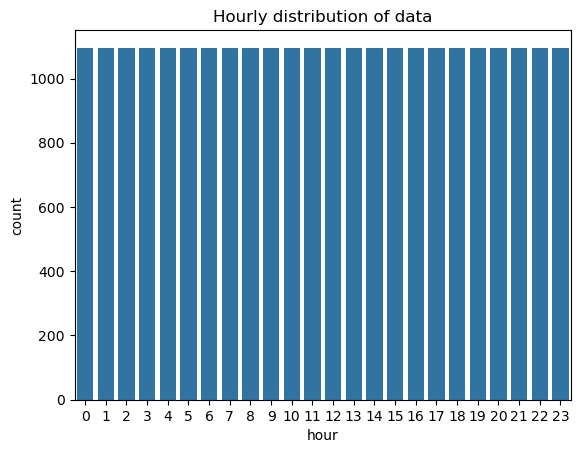

In [36]:
df_ned_json_data['validto'] = pd.to_datetime(df_ned_json_data['validto'])
print(df_ned_json_data['validto'].dtype)
print(df_ned_json_data['validto'].head(1))


import seaborn as sns
import matplotlib.pyplot as plt

df_ned_json_data['hour'] = df_ned_json_data['validto'].dt.hour
sns.countplot(x='hour', data=df_ned_json_data)
plt.title('Hourly distribution of data')
plt.show()

Intereative Plot

In [19]:
import plotly.express as px

df = df_orig_num

# 1. Interactive Time Series Plot
fig_line = px.line(
    df,
    x=df.index,
    y="volume_0",
    title="Interactive Power Generation Volume Time Series",
    labels={"x": "Time", "Volume": "Wh)"},
    template="plotly_dark"
)
fig_line.update_xaxes(rangeslider_visible=True)
fig_line.show()

# 2. Interactive Histogram of Energy Price
fig_hist = px.histogram(
    df,
    x="volume_0",
    nbins=50,
    title="Distribution of Power generation Volume",
    labels={"Volume": "Wh)"},
    template="plotly_dark"
)
fig_hist.update_layout(bargap=0.1)
fig_hist.show()

# 3. Interactive Box Plot for Energy Price
fig_box = px.box(
    df,
    y="volume_0",
    title="Box Plot of Volume",
    labels={"Volume": "Wh)"},
    template="plotly_dark"
)
fig_box.show()

Further analysis 

In [25]:
# 1. Check for Missing Values
print("Missing Values:\n")
print(df_ned_json_data.isnull().sum())
print("\nPercentage of Missing Values:\n")
print((df_ned_json_data.isnull().sum() / len(df_ned_json_data)) * 100)

# 2. Check for Duplicates
print("\nDuplicate Rows:\n")
print(df_ned_json_data.duplicated().sum())

# 3. Check Data Types
print("\nData Types:\n")
print(df_ned_json_data.dtypes)

Missing Values:

validto                           0
capacity_0                        0
volume_0                          0
capacity_1                        0
production_wind                   0
capacity_2                        0
production_solar                  0
capacity_4                        0
production_heatpump               0
capacity_8                        0
production_cofiring               0
capacity_9                        0
production_geothermal             0
capacity_10                       0
production_other                  0
capacity_11                       0
production_waste                  0
capacity_12                       0
production_biooil                 0
capacity_13                       0
production_biomass                0
capacity_14                       0
production_wood                   0
capacity_17                       0
production_windoffshore           0
capacity_18                       0
production_fossilgaspower         0
capacity_19

In [26]:
# 4. Basic Outlier Detection using IQR
print("\nOutlier Detection (IQR Method):\n")
for column in df_ned_json_data.select_dtypes(include=['int64', 'float64']).columns:
    Q1 = df_ned_json_data[column].quantile(0.25)
    Q3 = df_ned_json_data[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_ned_json_data[(df_ned_json_data[column] < (Q1 - 1.5 * IQR)) | (df_ned_json_data[column] > (Q3 + 1.5 * IQR))]
    print(f"{column}: {len(outliers)} outliers detected")


Outlier Detection (IQR Method):

capacity_0: 212 outliers detected
volume_0: 212 outliers detected
capacity_1: 0 outliers detected
production_wind: 0 outliers detected
capacity_2: 2069 outliers detected
production_solar: 2069 outliers detected
capacity_4: 736 outliers detected
production_heatpump: 736 outliers detected
capacity_8: 3337 outliers detected
production_cofiring: 3337 outliers detected
capacity_9: 0 outliers detected
production_geothermal: 0 outliers detected
capacity_10: 0 outliers detected
production_other: 0 outliers detected
capacity_11: 0 outliers detected
production_waste: 0 outliers detected
capacity_12: 0 outliers detected
production_biooil: 0 outliers detected
capacity_13: 0 outliers detected
production_biomass: 0 outliers detected
capacity_14: 138 outliers detected
production_wood: 138 outliers detected
capacity_17: 0 outliers detected
production_windoffshore: 0 outliers detected
capacity_18: 0 outliers detected
production_fossilgaspower: 0 outliers detected
capac

In [27]:
# 5. Summary Statistics
print("\nSummary Statistics:\n")
print(df_ned_json_data.describe(include='all'))


Summary Statistics:

                          validto  capacity_0  volume_0  capacity_1  \
count                       26304    2.63e+04  2.63e+04    2.63e+04   
unique                      26304         NaN       NaN         NaN   
top     2022-01-01 00:00:00+00:00         NaN       NaN         NaN   
freq                            1         NaN       NaN         NaN   
mean                          NaN    1.00e+07  1.00e+07    1.87e+06   
std                           NaN    4.73e+06  4.73e+06    1.72e+06   
min                           NaN    2.50e+06  2.50e+06    0.00e+00   
25%                           NaN    6.20e+06  6.20e+06    3.82e+05   
50%                           NaN    9.34e+06  9.34e+06    1.31e+06   
75%                           NaN    1.30e+07  1.30e+07    3.05e+06   
max                           NaN    2.92e+07  2.92e+07    6.52e+06   

        production_wind  capacity_2  production_solar  capacity_4  \
count          2.63e+04    2.63e+04          2.63e+04   